In [90]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import seaborn as sns
with open('ASTR19_S22_group_project_data.txt') as f:
    lines = f.readlines()
    day = [line.split()[1] for line in lines]
    tide = [line.split()[2] for line in lines]

In [87]:
data = np.loadtxt('ASTR19_S22_group_project_data.txt', dtype = "str")

day, time, tide = [],[],[]

for i in data:
        day = np.append(day, int(i[0]))
        time = np.append(time, i[1])
        tide = np.append(tide, float(i[2]))
timeinhours = []
for i in range(len(time)):
    hr= float(time[i].split(':')[0])
    minute= float(time[i].split(':')[1])
    timeinhours = np.append(timeinhours, hr + minute*(1/60) + (day[i]-1)*24)
    
x= np.array(timeinhours, dtype = float)
y= np.array(tide, dtype= float)

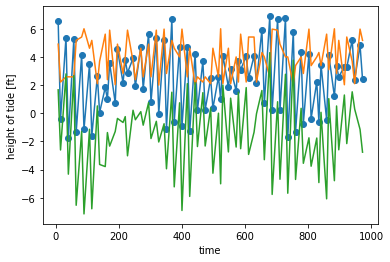

In [97]:
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('time')
plt.ylabel('height of tide [ft]')


def f_line(x,A,D,C,F,E):
    y_2=  A * np.sin(x * D) +  C * np.cos(np.pi * x * F) + E
    return y_2

guess = [10,4,10,8.9,3]
parameters, covariance = optimize.curve_fit(f_line, x, y,p0=guess)
A_fit=[0]
D_fit=[1]
C_fit=[2]
F_fit=[3]
E_fit=[4]

fit_f_line = f_line(x, A_fit,D_fit,C_fit,F_fit,E_fit)
y_2= A_fit * np.sin(x * D_fit) +  C_fit * np.cos(np.pi * x * F_fit) + E_fit

plt.plot(x, fit_f_line, '-', label='fit')
plt.savefig('function.pdf')
plt.plot(x,risiduals)

In [84]:
risiduals= y - y_2


[ 1.66201900e+00 -2.60798695e+00  2.79421356e+00 -4.32578644e+00
  2.67421356e+00 -6.53557050e+00 -1.28421356e+00 -7.15000000e+00
 -1.13803399e+00 -6.78557050e+00  5.22113033e-01 -3.63713107e+00
 -3.78803399e+00 -1.37196601e+00 -2.33211303e+00 -1.29462332e+00
 -3.67980999e-01 -6.54429495e-01 -2.40000000e-01 -3.02211303e+00
  2.12868930e-01 -4.61966011e-01  1.11966011e-01 -8.45786438e-01
  7.52019001e-01 -1.79578644e+00 -5.72113033e-01 -2.04000000e+00
 -7.45376681e-01 -3.94442950e+00  1.49442950e+00 -5.22803399e+00
  7.40000000e-01 -6.90537668e+00  2.10421356e+00 -5.90803399e+00
  2.17537668e+00 -2.36578644e+00  1.46201305e+00 -2.32578644e+00
  3.72113033e-01 -4.25803399e+00  4.21356237e-03 -5.01000000e+00
  2.00211303e+00 -2.74803399e+00  1.07211303e+00 -2.40000000e+00
  1.49201305e+00 -2.51803399e+00  1.82201305e+00 -2.92421356e+00
 -1.34421356e+00 -3.79869516e-02  1.61713107e+00 -3.30000000e+00
  4.30421356e+00 -5.76537668e+00  8.17886967e-01 -4.68798100e+00
  2.77000000e+00 -5.68000

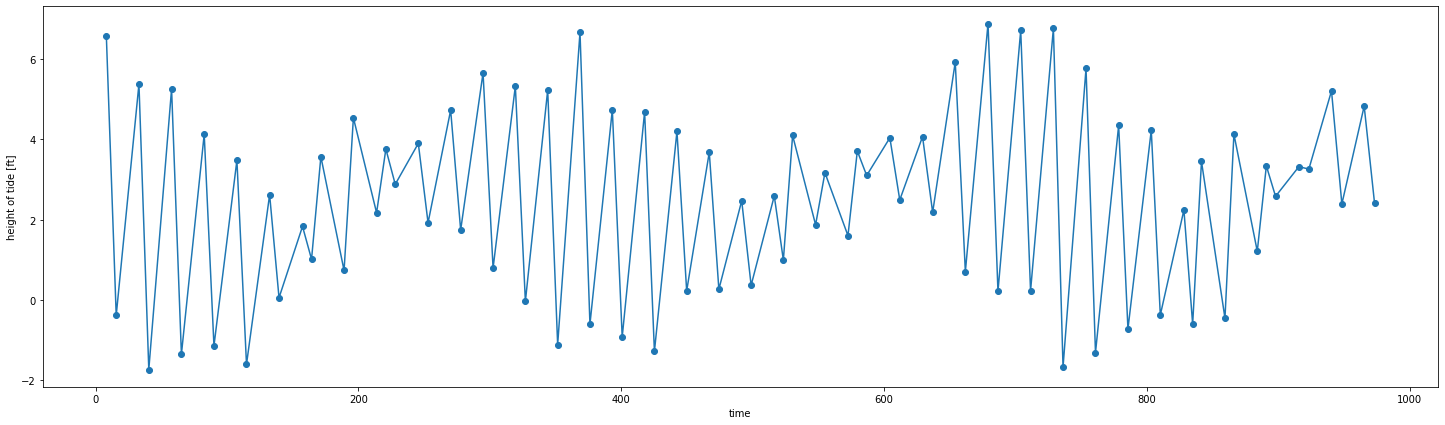

In [76]:
f=plt.figure(figsize=(25,7))
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('time')
plt.ylabel('height of tide [ft]')

plt.savefig('Tides_Graph.pdf',bbox_inches='tight')


(array([ 5.,  6.,  8.,  9., 10., 12., 14., 11.,  5.,  2.]),
 array([-7.15      , -6.00457864, -4.85915729, -3.71373593, -2.56831458,
        -1.42289322, -0.27747186,  0.86794949,  2.01337085,  3.15879221,
         4.30421356]),
 <BarContainer object of 10 artists>)

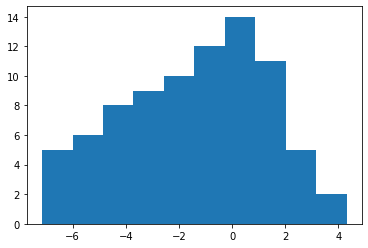

In [93]:
plt.hist(risiduals)

In [105]:
f=np.median(risiduals)
k=np.mean(risiduals)
s=np.min(risiduals)
w=np.max(risiduals)
u=np.std(risiduals)
print(u)

2.7342110366090036
